# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

# Шаг 1. Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    games = pd.read_csv('games.csv')
    games
except:
    games = pd.read_csv('/datasets/games.csv')
    games

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# подсчёт явных дубликатов
games.duplicated().sum()

0

# Шаг 2. Подготовка данных

In [7]:
#меняем столбцы
games.rename(columns={'Year_of_Release':'year', 'NA_sales':'na', 'JP_sales':'jp', 'EU_sales':'eu', 'Other_sales':'other'}, inplace=True)

#приводим к нижнему регистру
games.columns = games.columns.str.lower()

In [8]:
#меняем тип данных: year, critic_score, user_score
games[['year']] = games[['year']].astype('Int64')
#games[['critic_score']] = games[['critic_score']].astype('Int64')

In [9]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
#'tbd' - подлежит определению. Можно просто заменить на nan
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [11]:
games['user_score'] = games['user_score'].astype('float')

In [12]:
games[games['name'].isnull()]

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
games = games.dropna(subset = ['name'])

In [14]:
games.isnull().sum(axis=0).sort_values()

name               0
platform           0
genre              0
na                 0
eu                 0
jp                 0
other              0
year             269
rating          6764
critic_score    8576
user_score      9123
dtype: int64

In [15]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [16]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
#считаем суммы всех продаж
games['total_sales'] = games['na'] + games['eu'] + games['jp'] + games['other']
games['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16713, dtype: float64

In [18]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   year          16444 non-null  Int64  
 3   genre         16713 non-null  object 
 4   na            16713 non-null  float64
 5   eu            16713 non-null  float64
 6   jp            16713 non-null  float64
 7   other         16713 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    7590 non-null   float64
 10  rating        9949 non-null   object 
 11  total_sales   16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


**Объясняю пропуски**

- name - удаляем строки в которых нет названий игр
- platform - пропусков нет
- year - пропусков небольшой %, поэтому можно просто оставить
- genre - пропусков нет
- critic_score - пропусков в районе 50%, скорее всего критики не оценили игру, оставляем как есть
- user_score - пропусков в районе 50%, скорее всего пользователи не оценили игру, оствляем как есть
- rating - пропусков также большой процент, из-за того что организации ESRB присваевает рейтинг играм для США и Канады, поэтому заменим пропуски на 'undefined'

In [19]:
#заменим пропущенные значения на "undefiend"
games['rating'] = games['rating'].fillna('undefined')

# Вывод. Подготовка данных

Получилось много пропусков в столбцах critic_score, user_score, rating. Скорее всего игры новые, поэтому их не успели оценить критики и пользователи. Эти данные нельзя просто так отбросить, они могут пригодиться для дальнейшего анализа.

# Шаг 3. Исследовательский анализ данных

In [20]:
#определяем max год
games['year'].max()

2016

In [21]:
#определяем min год
games[games['year'] > 1900]['year'].min()

1980

<AxesSubplot:>

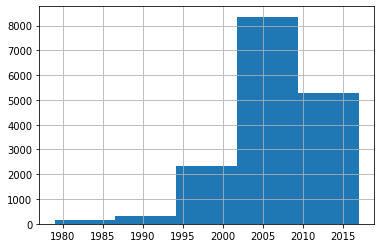

In [22]:
#сколько игр выпускалось в разные годы
games['year'].hist(bins = 5, range=(1979, 2017))

Игры начали выпускаться с 1980. Данные до 1994 года не так сильно важны.

<AxesSubplot:>

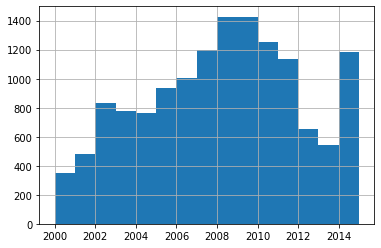

In [23]:
games['year'].hist(bins = 15, range=(2000, 2015))

Самый важный период с 2005 по 2009 год. По графику видно резкий рост, в этот промежуток времени выпускалось наибольшее количество игр.

In [24]:
#определяем платформы с наибольшими суммарными продажами
platforms_ascending = games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
top10_platforms = platforms_ascending.reset_index()
iloc_top10_platforms = top10_platforms.iloc[0:10]
top10_platforms = iloc_top10_platforms['platform'].unique()
platforms_ascending

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


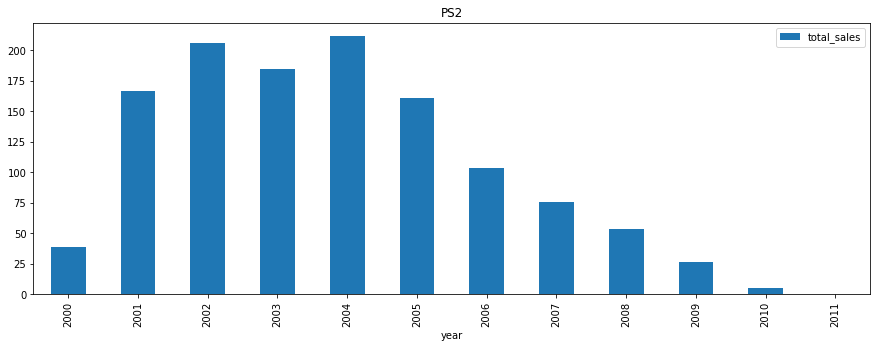

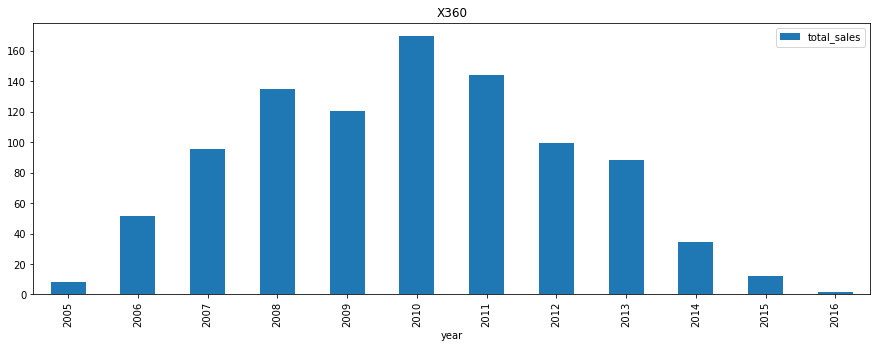

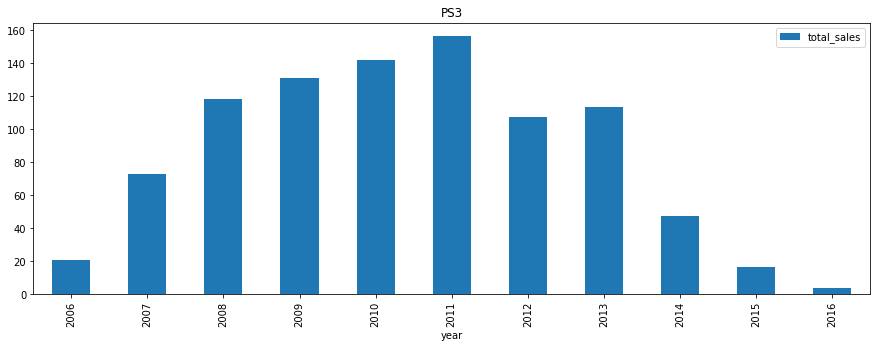

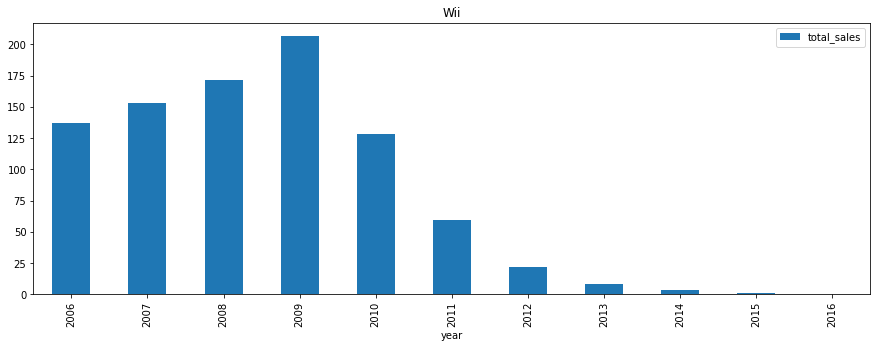

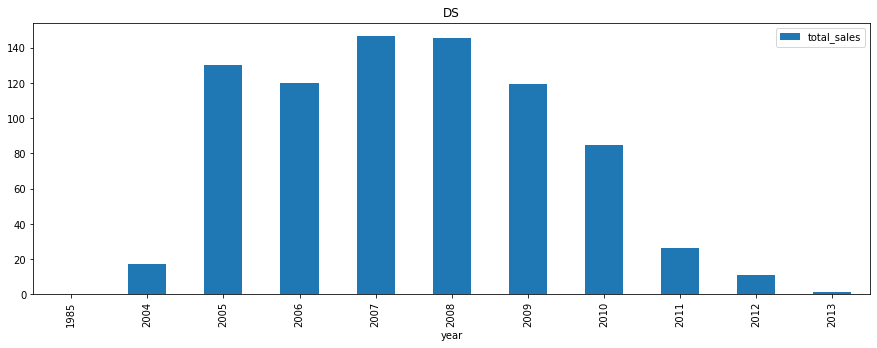

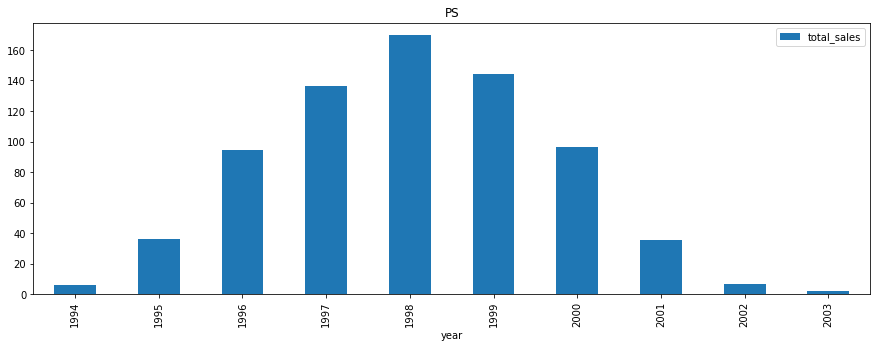

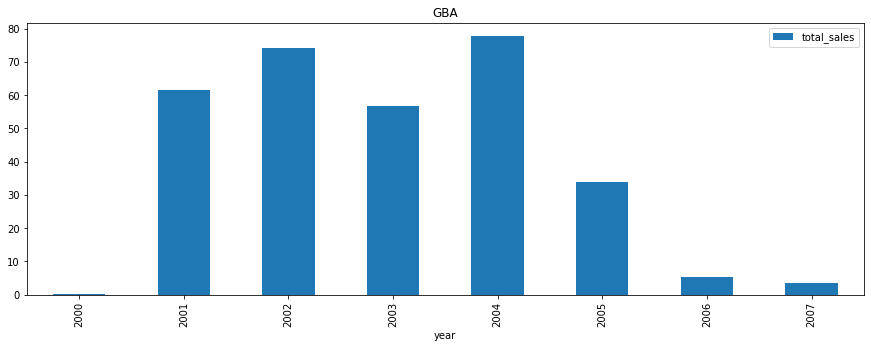

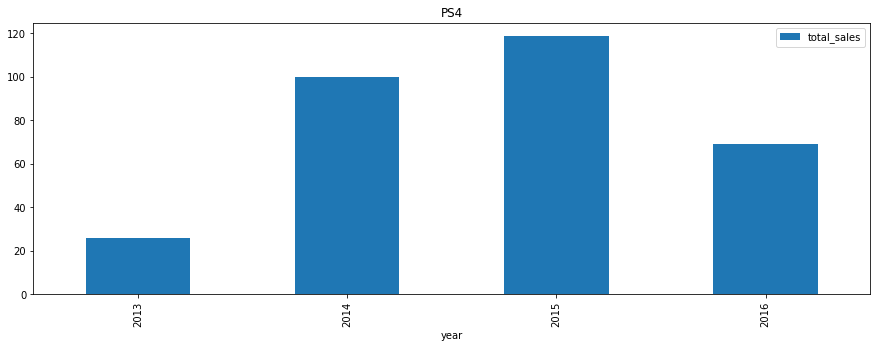

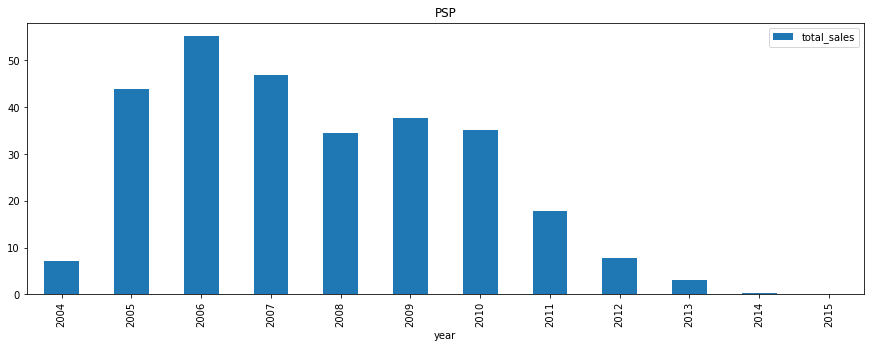

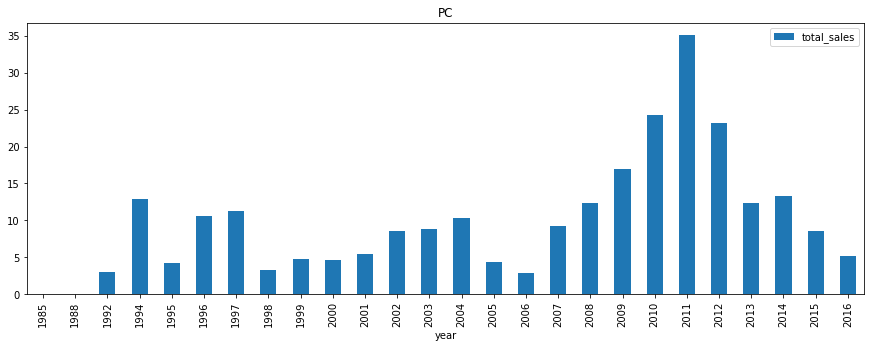

In [25]:
#распределение по годам
for platform in top10_platforms:
    games[games['platform'] == platform].pivot_table(index = 'year', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize=(15,5))
    plt.title(platform)

Большинство платформ появляется в начале 2000-x, особенно в 2006 году. Актуальный период 2006 - 2016.

In [26]:
#возьмем все данные после 2013 года
actual_data = games.query('year >= 2013')

In [27]:
#Сохраним в переменной games_top_6_platforms только последние поколения платформ и избавимся от выбросов
list_of_top_6 = ['PS4','XOne','PC','WiiU','3DS', 'PSV']
games_top_6_platforms = actual_data[actual_data['platform'].isin(['PS4','XOne','PC','WiiU','3DS', 'PSV'])]
games_top_6_platforms = games_top_6_platforms[games_top_6_platforms['total_sales']<1.4]

In [28]:
games_top_6_platforms['total_sales'].describe()

count    1468.000000
mean        0.202663
std         0.273785
min         0.010000
25%         0.030000
50%         0.080000
75%         0.250000
max         1.390000
Name: total_sales, dtype: float64

<AxesSubplot:xlabel='year'>

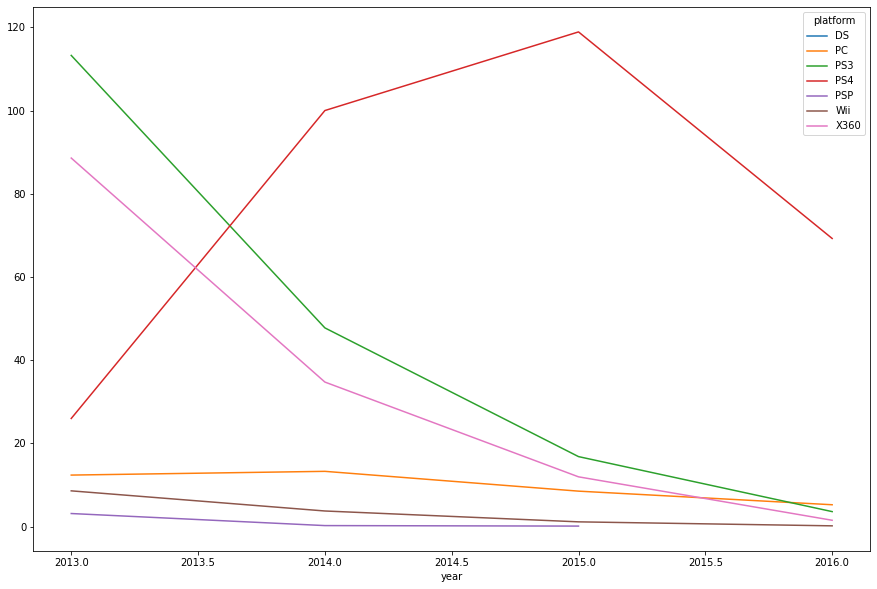

In [29]:
#построим графики по количеству выпущенных игр за актуальный период на разных платформах
actual_data.query('platform in @top10_platforms').pivot_table(index='year', columns = 'platform', values='total_sales', aggfunc='sum').plot(figsize=(15, 10))

Игры на PS4 продаются гораздо чаще потому, что консоль появилась не так давно. Следовательно из-за появления новой версии продажи PS3 падают сильнее всего. По аналогии можно предположить, что тоже самое происходит и с X360. В 2013 году вышла XOne поэтому продажи X360 стали падать, пользователи хотят использовать новые версии консолей.
- Потенциально прибыльные: PS4, XOne
- Потенциально не будут продаваться: PS3, X360

<AxesSubplot:>

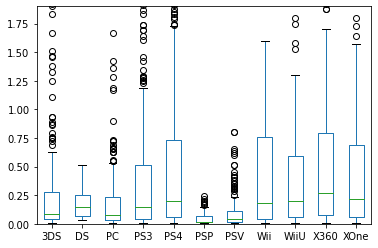

In [30]:
#строим график «ящик с усами» по глобальным продажам игр
actual_data.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(kind='box', ylim=(0,1.9))

Мы не учли консоль только набирающую популярность - XOne. На нее было выпущено не так много игр, поэтому мы ее не включили в предыдущий график, но игры этой консоли очень хорошо продаются, потому что медианные значения PS4 и XOne почти совпадают. Добавим XOne в список потенциально прибыльных.

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

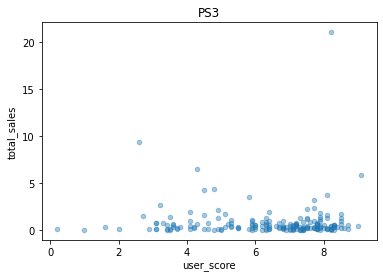

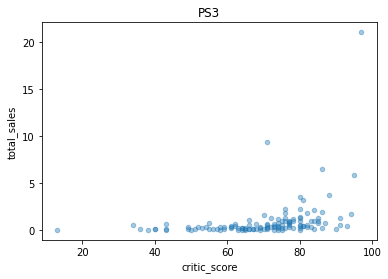

In [31]:
#для платформы PS3 построим графики зависимости продаж от оценок пользователей и критиков
PS3 = actual_data[actual_data['platform']=='PS3']
PS3.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.4, title='PS3')
plt.show()
PS3.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.4, title='PS3')
plt.show()

In [32]:
#посчитаем коэффициент корреляции Пирсона
print('Коэффицент Пирсона по оценкам пользователей: ', PS3['user_score'].corr(PS3['total_sales']))
print('Коэффицент Пирсона по оценкам критиков: ', PS3['critic_score'].corr(PS3['total_sales']))

Коэффицент Пирсона по оценкам пользователей:  0.0023944027357566925
Коэффицент Пирсона по оценкам критиков:  0.3342853393371919


По диаграммам рассеяния видна прямая зависимость: чем больше рейтинг игры, тем выше ее продажи. При этом по коэффициентам Пирсона видно, что зависимость от оценок критиков сильней, чем от оценок пользователей.

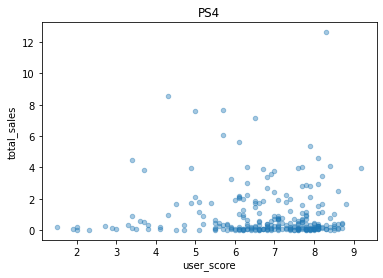

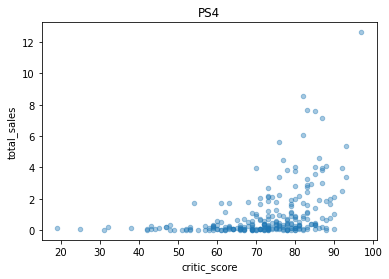

Коэффицент Пирсона по оценкам пользователей для PS4 : -0.031957110204556376
Коэффицент Пирсона по оценкам критиков для PS4 : 0.40656790206178095


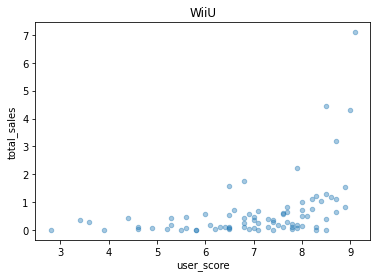

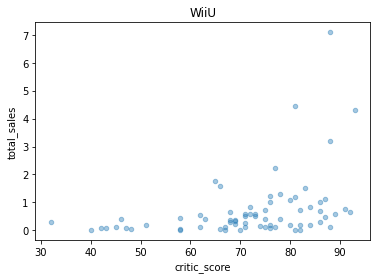

Коэффицент Пирсона по оценкам пользователей для WiiU : 0.4193304819266187
Коэффицент Пирсона по оценкам критиков для WiiU : 0.3764149065423912


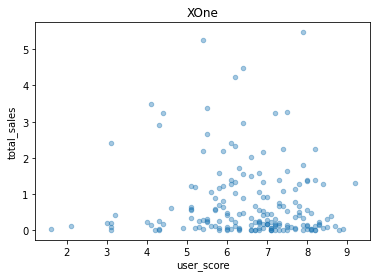

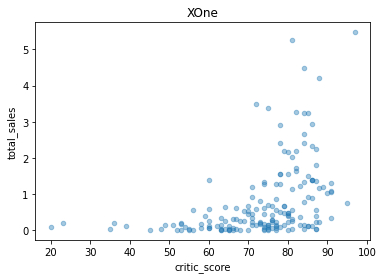

Коэффицент Пирсона по оценкам пользователей для XOne : -0.06892505328279414
Коэффицент Пирсона по оценкам критиков для XOne : 0.4169983280084017


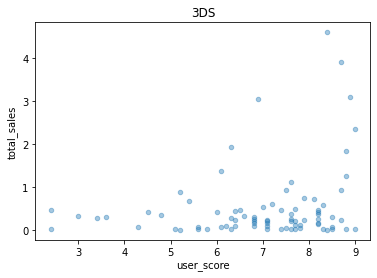

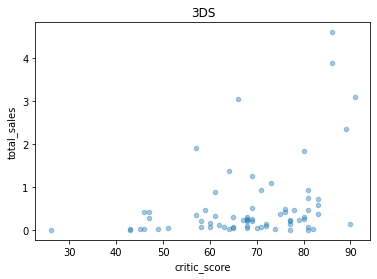

Коэффицент Пирсона по оценкам пользователей для 3DS : 0.24150411773563016
Коэффицент Пирсона по оценкам критиков для 3DS : 0.3570566142288103


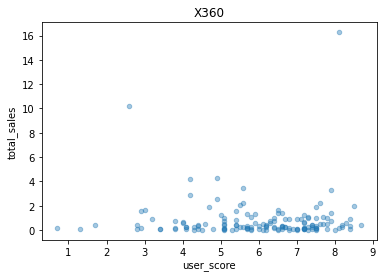

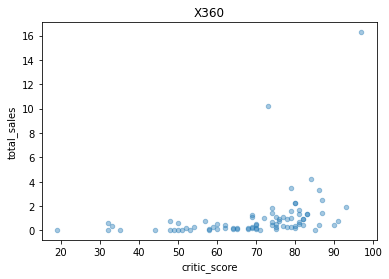

Коэффицент Пирсона по оценкам пользователей для X360 : -0.011742185147181342
Коэффицент Пирсона по оценкам критиков для X360 : 0.3503445460228664


In [33]:
#посмотрим на эти зависимости для топ-5 платформ
top5 = ['PS4', 'WiiU', 'XOne', '3DS', 'X360']

for name in top5:
    df = actual_data.query('platform == @name')
    df.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.4)
    plt.title(name)
    plt.show()
    df.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.4)
    plt.title(name)
    plt.show()
    print('Коэффицент Пирсона по оценкам пользователей для',name,':',df['user_score'].corr(df['total_sales']))
    print('Коэффицент Пирсона по оценкам критиков для',name,':',df['critic_score'].corr(df['total_sales']))

**Вывод:**

У PS4, WiiU, XOne, 3DS, X360 наблюдается пусть и не сильная, но всё же, связь между оценками критиков и продажами. А связь между оценками пользователей и продажами слабая у всех платформ, либо её совсем нет. Покупатели прислушиваются больше к критикам, нежели к оценкам других пользователей.

**Определяем самые прибыльные жанры**

<AxesSubplot:ylabel='total_sales'>

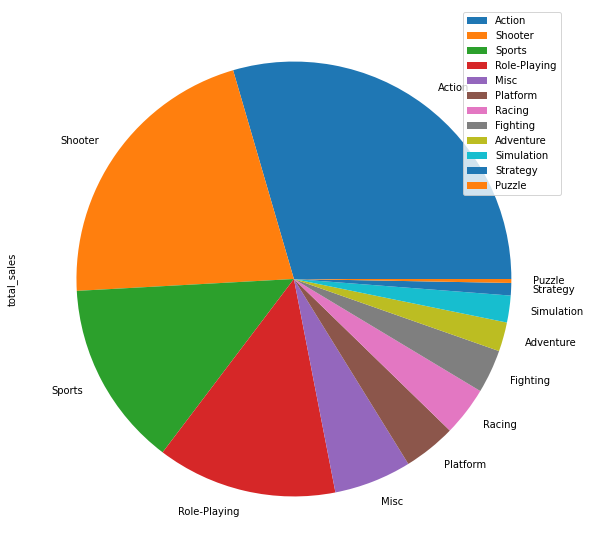

In [34]:
#определяем самые популярные жанры
actual_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'total_sales').plot(kind='pie', figsize=(10,10), y= 'total_sales')

In [35]:
#определяем самые прибыльные жанры
actual_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'total_sales')

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


- Самые прибыльные жанры - Action, Sports, Shooter
- Наименее прибыльные жанры - Adventure, Puzzle, Strategy

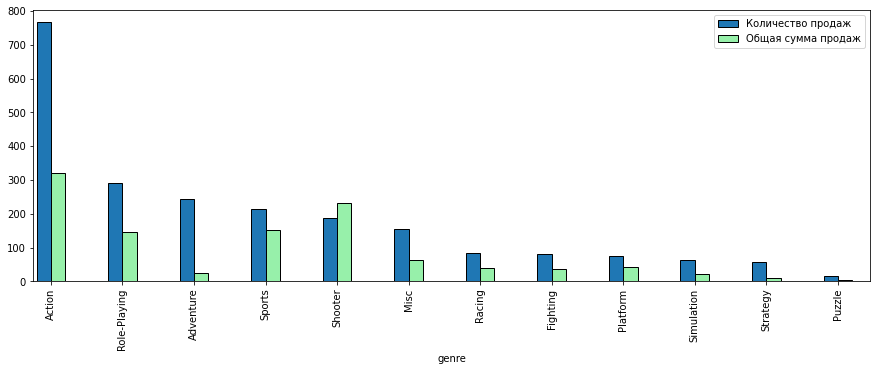

In [36]:
ax = plt.gca()

pivot = actual_data.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)

plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=1)

plot2 = pivot['total_sales']
plot2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='#97F0AA', position=0)

ax.legend(['Количество продаж', 'Общая сумма продаж'])

In [37]:
ratio_genres = actual_data.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)

In [38]:
ratio_genres['ratio'] = ratio_genres['total_sales'] / ratio_genres['name']
ratio_genres.sort_values(by='ratio', ascending=False)

,name,total_sales,ratio
genre,,,
Shooter,187,232.98,1.245882
Sports,214,150.65,0.703972
Platform,74,42.63,0.576081
Role-Playing,292,145.89,0.499623
Racing,85,39.89,0.469294
Fighting,80,35.31,0.441375
Action,766,321.87,0.420196
Misc,155,62.82,0.405290
Simulation,62,21.76,0.350968


**Вывод:**
- Самый прибылный жанр - Шутеры
- Самый не прибыльный - Адвенчюры

# Шаг 4. Портрет пользователя каждого региона

<AxesSubplot:xlabel='platform'>

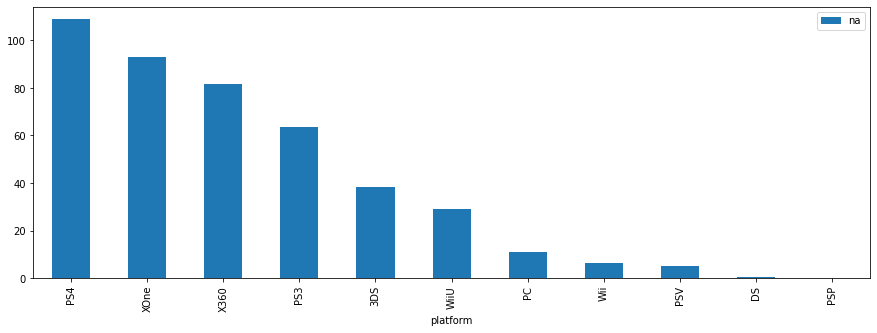

In [39]:
#продажи в Северной Америке
actual_data.pivot_table(index = 'platform', values = 'na', aggfunc = 'sum').sort_values(ascending=False, by = 'na').plot(kind = 'bar', figsize=(15,5))

Пользователи Северной Америки больше всего предпочитают Xbox360, скорее всего из-за того, что консоль американская.

<AxesSubplot:xlabel='platform'>

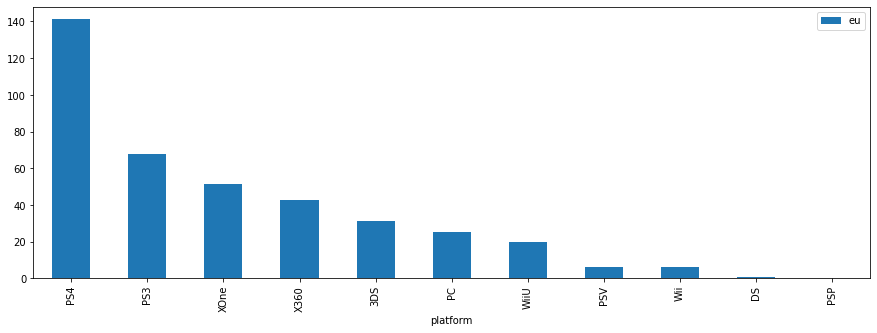

In [40]:
#продажи в Европе
actual_data.pivot_table(index = 'platform', values = 'eu', aggfunc = 'sum').sort_values(ascending=False, by = 'eu').plot(kind = 'bar', figsize=(15,5))

Пользователи из Европы выбирают японские платформы и американскую консоль Xbox360.

<AxesSubplot:xlabel='platform'>

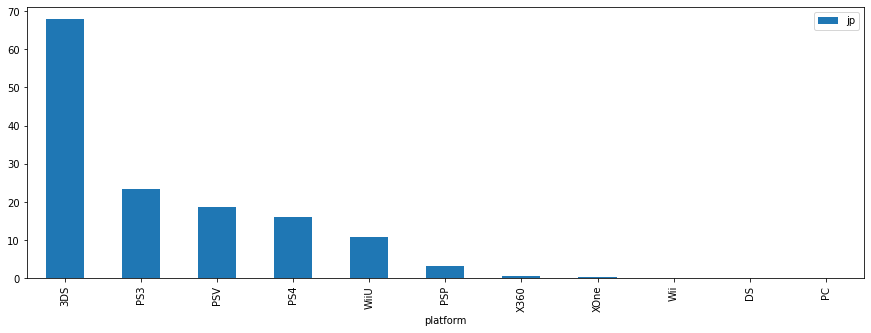

In [41]:
#продажи в Японии
actual_data.pivot_table(index = 'platform', values = 'jp', aggfunc = 'sum').sort_values(ascending=False, by = 'jp').plot(kind = 'bar', figsize=(15,5))

Подавляющее большинство японских пользователей играют в японские платформы.

In [42]:
#популярные жанры в Северной Америке
actual_data.pivot_table(index = 'genre', values = 'na', aggfunc = 'sum').sort_values(ascending=False, by = 'na')

,na
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


Популярные жанры в Северной Америке:
- Action
- Shooter
- Sports

In [43]:
#популярные жанры в Европе
actual_data.pivot_table(index = 'genre', values = 'eu', aggfunc = 'sum').sort_values(ascending=False, by = 'eu')

,eu
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


Популярные жанры в Европе:
- Action
- Shooter
- Sports

In [44]:
#популярные жанры в Японии
actual_data.pivot_table(index = 'genre', values = 'jp', aggfunc = 'sum').sort_values(ascending=False, by = 'jp')

,jp
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


Популярные жанры в Японии:
- Role-Playing
- Action
- Misc

Пользователи Северной Америки и Европы предпочитают одни и те же консоли и игры, поэтому популярны жанры - Action, Sports, Shooter. В Японии преобладает жанр - Role-Playing скорее всего из-за того, что у пользователей портативные консоли.

In [45]:
#определяем влияние рейтинга ESRB в отдельных регионах
actual_data['region'] = actual_data['eu'] + actual_data['jp'] + actual_data['na']
actual_data['region']

16       17.09
23       14.86
31       12.25
33       13.82
42       10.65
         ...  
16703     0.01
16707     0.01
16710     0.01
16712     0.01
16714     0.01
Name: region, Length: 2233, dtype: float64

In [46]:
ESRB = actual_data.pivot_table(index = 'rating', values = ['eu','jp','na'], aggfunc = 'sum')
ESRB

,eu,jp,na
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79
undefined,78.91,85.05,89.42


**Вывод:**

- В Европе самые высокие рейтинги у жанра M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.). Игры, в которых жанры неопределенны на третьем месте. Остальные жанры менее популярные.

- В Японии самые высокие рейтинги у игр, в которых жанры неопределенны, остальные жанры менее популярные. Скорее всего это связано с тем, что сам по себе рейтнг ESRB принадлежит американской компании, следовательно не все японские игры проходят его.

- В Северной Америке самые высокие рейтинги у жанра M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.), далее по популярности игры, в которых жанры неопределенны. Остальные жанры менее популярные.

# Шаг 5. Проверка гипотез

**Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Имеется утверждение, что рейтинги платформ Xbox One и PC одинаковые.

Поскольку не важно в какую сторону проверяется значение рейтингов большую или меньшую, то тест двухсторонний. Буду применять специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind(array1, array2, equal_var)

Параметры:
- equal_var = False
- alpha = .05

Необходимо учесть, что нулевая гипотеза не может предполагать неравенство. Условие ее применения - это отсутствие различий, отсутствие влияния какого-либо фактора, но при этом она допускае наличие незначительных, очень малых случайных значений. Исходя из этого, гипотезы постоены так:
- Нулевая гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC - одинаковые
- Альтернативная гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC - разные

In [47]:
XOne = actual_data[(actual_data['platform'] == 'XOne') &  (actual_data['user_score'] > 0)]['user_score']
PC = actual_data[(actual_data['platform'] == 'PC') &  (actual_data['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг платформы Xbox One:', XOne.mean())
print('Средний пользовательский рейтинг платформы PC', PC.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC 6.2696774193548395


In [48]:
#выполним проверку гипотезы. Будем использовать метод ttest_ind
#если p-value окажется меньше него - отвергнем гипотезу
alpha = .05
results = st.ttest_ind(XOne, PC, equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


**Вывод**

p-value показал, что вероятность случайно получить такое или большее различие равно почти 15%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами платформ Xbox One и PC. Не получилось отвергнуть нулевую гипотезу. 

**Гипотеза №2: Средние пользовательские рейтинги жанров Action и Sports разные**

Имеется утверждение, что рейтинги жанров Action и Sports разные.

Поскольку не важно в какую сторону проверяется значение рейтингов большую или меньшую, то тест двухсторонний. Буду применять специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind(array1, array2, equal_var)

Параметры equal_var и alpha аналогичные, как и в предыдущем исследовании.

Необходимо учесть, что нулевая гипотеза не может предполагать неравенство. Условие ее применения - это отсутствие различий, отсутствие влияния какого-либо фактора, но при этом она допускае наличие незначительных, очень малых случайных значений. Исходя из этого, гипотезы постоены так:
- Нулевая гипотеза H0: Средние пользовательские рейтинги жанров Action и Sports равны
- Альтернативная гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports не равны

In [49]:
Action = actual_data[(actual_data['genre'] == 'Action') &  (actual_data['user_score'] > 0)]['user_score']
Sports = actual_data[(actual_data['genre'] == 'Sports') &  (actual_data['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг жанра Action:', Action.mean())
print('Средний пользовательский рейтинг жанра Sports', Sports.mean())

Средний пользовательский рейтинг жанра Action: 6.837532133676092
Средний пользовательский рейтинг жанра Sports 5.238124999999999


In [50]:
#выполним проверку гипотезы. Будем использовать метод ttest_ind
#если p-value окажется меньше него - отвергнем гипотезу
alpha = .05
results = st.ttest_ind(Action, Sports, equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Вывод**

Отвергаем нулевую гипотезу. Таким образом, остается верным утверждение, что **средние пользовательские рейтинги жанров Action и Sports не равны**

# Шаг 6. Общий вывод

**Северная Америка**
* Игры ESRB: M, undefined, E
* Платформы: PS4, XOne, X360
* Жанры: Action, Shooter, Sports, Role-Playing

**Европа**
* Игры ESRB: M, E, undefined
* Платформы: PS3, Xbox360, Wii, DS
* Жанры: Action, Shooter, Sports, Role-Playing

**Япония**
* Игры ESRB: undefined, T, E
* Платформы: 3DS, PS3, PSV, PS4
* Жанры: Role-Playing, Action, Misc